In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

Name of the Sonnet file "Microstrip_ref.son". Sonnet generates s2p files for the different parameters which are sweeped.

In [2]:
path="" 

MicroStrip = []
for i in range(1,6): #example for 5 perameters
    #file_name = path+f"/Microstrip_ref_param{i:0}"+".s2p"
    file_name =path+"/"+ str(i)+".s2p"
    MicroStrip.append(rf.Network(file_name))

FileNotFoundError: [Errno 2] No such file or directory: '/1.s2p'

In [ ]:
Param=[r'210 $\mu m$',r'220 $\mu m$',r'230 $\mu m$',r'240 $\mu m$',r'250 $\mu m$']

Plot the transmission in dB scale

In [3]:
for i in range(5):
    MicroStrip[i].plot_s_db(0,0, label=Param[i])

IndexError: list index out of range

Plot the magnitude of the transmission 

In [4]:
for i in range(4):
    freq = MicroStrip[i].frequency.f
    plt.plot(1e-9*freq,np.abs(MicroStrip[i].s[:,0,0]), label=Param[i])
    plt.legend(loc="upper left")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("$|S_{11}| (dB)$")

IndexError: list index out of range

Plot the phase of the transmission 

In [5]:
for i in range(4):
    freq = MicroStrip[i].frequency.f
    plt.plot(1e-9*freq,(np.angle(MicroStrip[i].s[:,0,1])), label=Param[i])
    plt.legend(loc="upper left")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("$Arg(S_{11})$")

IndexError: list index out of range

Plot the phase of the transmission 

IndexError: list index out of range

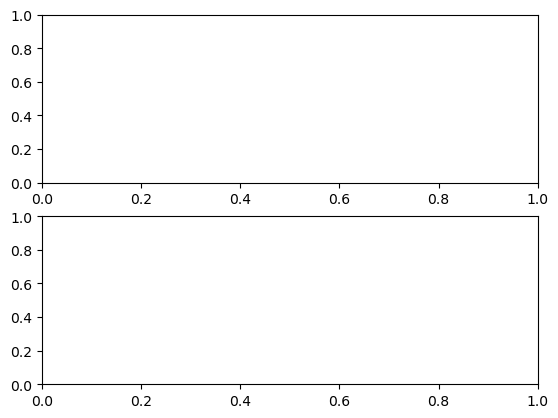

In [6]:
fig, axs = plt.subplots(2)
freq = MicroStrip[2].frequency.f
axs[0].plot(1e-9*freq,10*np.log(np.abs(MicroStrip[2].s[:,0,0])), label=Param[2])
axs[1].plot(1e-9*freq,(np.angle(MicroStrip[2].s[:,0,1])), label=Param[2])  
axs[0].set(ylabel="$|S_{11}| (dB)$")
axs[1].set(xlabel="frequency (GHz)", ylabel="$Arg S_{11}$")

Fit the phase to deduce the group velocity of the signal and the effective dielectric constant of the µ-strip line

In [ ]:
L0=4e-3 # line length (between calibrated ports)
freq = MicroStrip[0].frequency.f
poly=np.polyfit(freq, np.angle(MicroStrip[0].s[:,0,1]), 1)
v_g=(abs(2*np.pi*L0/poly[0]))
epsilon_eff=v_g/3e8

In [7]:
print('groupe velocity=' + str(np.round(1e-8*v_g,2)) +'e8 m/s')
print('\\epsilon_{eff}=' + str(np.round((3e8/v_g)**2,2)))

NameError: name 'v_g' is not defined